In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd gdrive/'My Drive'/

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
/content/gdrive/My Drive


# Download data

In [0]:
import nltk
from smart_open import smart_open
nltk.download('brown') 
# Only the brown corpus is needed in case you don't have it.

# Generate brown corpus text file
with smart_open('brown_corp.txt', 'w+') as f:
    for word in nltk.corpus.brown.words():
        f.write('{word} '.format(word=word.lower()))

# Make sure you set FT_HOME to your fastText directory root
FT_HOME = 'fastText-0.9.1/'
# download the text8 corpus (a 100 MB sample of cleaned wikipedia text)
import os.path
if not os.path.isfile('text8'):
    !wget -c http://mattmahoney.net/dc/text8.zip
    !unzip text8.zip

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


# Train models

In [0]:
!wget https://github.com/facebookresearch/fastText/archive/v0.9.1.zip
!unzip v0.9.1.zip

In [0]:
%cd fastText-0.9.1

/content/gdrive/My Drive/fastText-0.9.1


In [0]:
!make

c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c src/meter.cc
c++ -pthread -std=c++0x -march=native -O3 -funroll-loops -DNDEBUG -c s

In [0]:
!pip install .

Processing /content/gdrive/My Drive/fastText-0.9.1
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2388079 sha256=ae50dea518a48c77407472d5c08f701778a84d661826e09a49f3b1385bb8c783
  Stored in directory: /root/.cache/pip/wheels/cf/23/9d/86084f6316701f7634a7b1b82d2bb946b19378edf14109f624
Successfully built fasttext


In [0]:
%cd ..

/content/gdrive/My Drive


In [0]:
#!rm -r fastText-0.9.1

#Word Sampling


In [0]:
import networkx as nx
import re 
import numpy as np

def create_g(f, number_of_w, sub=''):
  dG = nx.Graph()
  wordList2 = re.findall('\w+', f)
  for indx, word in enumerate(wordList2[:-2]):
    next_word = wordList2[indx + 1]

    if not dG.has_node(word):
        dG.add_node(word)
        dG.nodes[word]['count'] = 1
    else:
        dG.nodes[word]['count'] += 1
    if not dG.has_node(next_word):
        dG.add_node(next_word)
        dG.nodes[next_word]['count'] = 1
    if not dG.has_edge(word, next_word):
        dG.add_edge(word, next_word, weight=1)
    else:
        dG.edges[(word, next_word)]['weight'] += 1

  n_d = [(n,d) for n, d in dG.degree()]
  degree_sequence = sorted(n_d, key = lambda x:x[1], reverse=True)
  w_sence = degree_sequence[:number_of_w]
  print('Nomber of nodes: {}'.format(len(dG.nodes())))
  a = '('
  for i in w_sence:
    a+=' '+i[0]+' |'
  a = a[:-1]
  a+=')'
  print('Which words will be deleted or replaced: \n {}'.format(a))
  res = re.sub(a, sub, f)
  return res, dG

In [0]:
br = open('brown_corp.txt', 'r').read()
br_gr = create_g(br, 20, 'X')
with smart_open('brown_corp_cl.txt', 'w+') as g:
  g.write(br_gr[0])

Nomber of nodes: 42431
Which words will be deleted or replaced: 
 ( the | and | of | in | a | to | for | was | with | is | that | s | as | he | his | or | by | on | it | at )


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
br = open('text8', 'r').read()
text8 = create_g(br, 40, 'X')
with smart_open('text8_cl', 'w+') as g:
  g.write(text8[0])

Nomber of nodes: 253854
Which words will be deleted or replaced: 
 ( the | and | of | in | a | to | one | or | is | as | s | by | for | with | was | on | from | that | two | are | which | at | it | this | but | three | also | an | his | were | four | zero | he | five | has | who | six | see | their | some )


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
bron_wo_gr = br_gr[1]
def statistics(G):
  print('Important statistics of the graph')
  print('Number of edges in graph :',len(list(G.edges)))
  print('Number of nodes in graph :',len(list(G.nodes)))
  print('Density : {}'.format(len(list(G.edges))/(len(list(G.nodes))*(len(list(G.nodes))-1))))
  #print('Diameter : {0:0.02f}'.format(nx.diameter(G)))
  #print('Avg. cl. coef : {0:0.02f}'.format(nx.average_clustering(G)))
  #print('Average path length : {0:0.02f}'.format(nx.average_shortest_path_length(G)))
  #print('Transitivity : {0:0.02f}'.format(nx.transitivity(G)))
  

statistics(bron_wo_gr)

Important statistics of the graph
Number of edges in graph : 421272
Number of nodes in graph : 42431
Density : 0.00023399484809411749


In [0]:
text8_wo_gr = text8[1]
statistics(text8_wo_gr)

Important statistics of the graph
Number of edges in graph : 3794519
Number of nodes in graph : 253854
Density : 5.8883066709688926e-05


In [0]:
import matplotlib.pyplot as plt
import math
def plot_log_dist(g):
  nodes =[i for i in g.nodes(data=True)]
  sort_nodes = sorted(nodes, key = lambda x:x[1]['count'], reverse=True)
  plt.plot([math.log(i[1]['count']) for i in sort_nodes])
  plt.xlabel('Node Id')
  plt.ylabel('log(degree(k))')
  plt.title('Degree Distribution')
  plt.show()

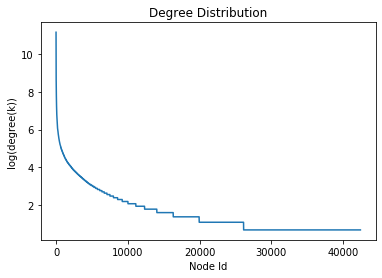

In [0]:
plot_log_dist(bron_wo_gr)

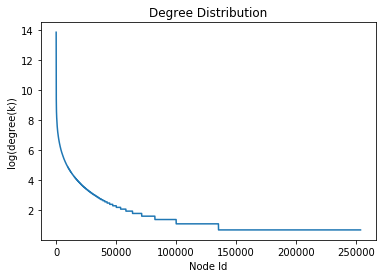

In [0]:
plot_log_dist(text8_wo_gr)

In [0]:
def creat_subg(g):
  nodes =[i for i in g.nodes(data=True)]
  sort_nodes = sorted(nodes, key = lambda x:x[1]['count'], reverse=True)
  print(sort_nodes[:150])
  not_important = sort_nodes[:150]+sort_nodes[2500:]
  sub_graph = g
  for i in not_important:
    sub_graph.remove_node(i[0])
  return sub_graph, [i for i, j in sort_nodes[:150]]

[('the', {'count': 70003}), ('of', {'count': 36474}), ('and', {'count': 28936}), ('to', {'count': 26248}), ('a', {'count': 23503}), ('in', {'count': 21423}), ('that', {'count': 10790}), ('is', {'count': 10110}), ('was', {'count': 9815}), ('he', {'count': 9802}), ('for', {'count': 9501}), ('it', {'count': 9095}), ('with', {'count': 7291}), ('as', {'count': 7256}), ('his', {'count': 7000}), ('on', {'count': 6766}), ('be', {'count': 6389}), ('s', {'count': 6251}), ('i', {'count': 5933}), ('at', {'count': 5378}), ('by', {'count': 5347}), ('this', {'count': 5147}), ('had', {'count': 5134}), ('not', {'count': 4621}), ('are', {'count': 4395}), ('but', {'count': 4383}), ('from', {'count': 4372}), ('or', {'count': 4227}), ('have', {'count': 3943}), ('they', {'count': 3764}), ('an', {'count': 3752}), ('you', {'count': 3635}), ('which', {'count': 3562}), ('one', {'count': 3505}), ('were', {'count': 3286}), ('all', {'count': 3100}), ('her', {'count': 3037}), ('she', {'count': 2988}), ('we', {'coun

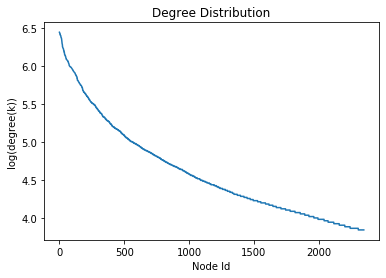

In [0]:
sub_bron_wo_gr = creat_subg(bron_wo_gr)
plot_log_dist(sub_bron_wo_gr[0])

[('the', {'count': 1061397}), ('of', {'count': 593678}), ('and', {'count': 416630}), ('one', {'count': 411765}), ('in', {'count': 372202}), ('a', {'count': 325874}), ('to', {'count': 316377}), ('zero', {'count': 264976}), ('nine', {'count': 250431}), ('two', {'count': 192645}), ('is', {'count': 183154}), ('as', {'count': 131816}), ('eight', {'count': 125286}), ('for', {'count': 118446}), ('s', {'count': 116711}), ('five', {'count': 115789}), ('three', {'count': 114776}), ('was', {'count': 112808}), ('by', {'count': 111832}), ('that', {'count': 109511}), ('four', {'count': 108183}), ('six', {'count': 102146}), ('seven', {'count': 99684}), ('with', {'count': 95604}), ('on', {'count': 91251}), ('are', {'count': 76528}), ('it', {'count': 73335}), ('from', {'count': 72872}), ('or', {'count': 68946}), ('his', {'count': 62604}), ('an', {'count': 61926}), ('be', {'count': 61282}), ('this', {'count': 58833}), ('which', {'count': 54789}), ('at', {'count': 54577}), ('he', {'count': 53574}), ('als

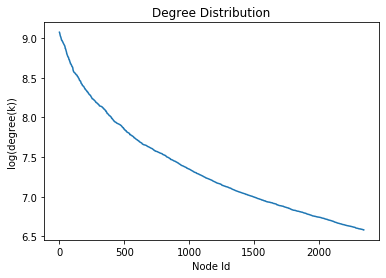

In [0]:
sub_text8_wo_gr = creat_subg(text8_wo_gr)
plot_log_dist(sub_text8_wo_gr[0])

In [0]:
a = set(sub_text8_wo_gr[1]).intersection(set(sub_bron_wo_gr[1]))
print('{0:0.3f} % of words in two graphs have the highest node degree'.format((len(a)/ len(sub_text8_wo_gr[1]+sub_bron_wo_gr[1]))*100))

33.667 % of words in two graphs have the highest node degree


In [0]:
l = nx.betweenness_centrality(sub_bron_wo_gr[0])

In [0]:
sot_l = sorted(l.items(), key = lambda x: x[1], reverse=True)
sot_l[:100]

[('without', 0.023365749457513938),
 ('however', 0.015986257193229877),
 ('during', 0.015242428258313864),
 ('every', 0.014523370648605633),
 ('until', 0.01213103146904911),
 ('american', 0.012004325935201213),
 ('against', 0.010639867132552851),
 ('again', 0.010055604603808289),
 ('upon', 0.009641684935297136),
 ('high', 0.009448572801774316),
 ('small', 0.009087352478593208),
 ('himself', 0.008704428885102818),
 ('better', 0.00829466369085395),
 ('came', 0.008048111876750237),
 ('general', 0.007679794255504836),
 ('within', 0.0076129852550842515),
 ('around', 0.00742750957278119),
 ('always', 0.00715860240272023),
 ('yet', 0.007122610173101187),
 ('d', 0.006987282671065862),
 ('today', 0.006915149845076069),
 ('once', 0.006853027528520926),
 ('toward', 0.00685160179668074),
 ('home', 0.0068147171620758845),
 ('several', 0.00675823518079074),
 ('whose', 0.006638854760283151),
 ('3', 0.006471523211918032),
 ('four', 0.0064027960044401),
 ('public', 0.006366549177668128),
 ('rather', 0.

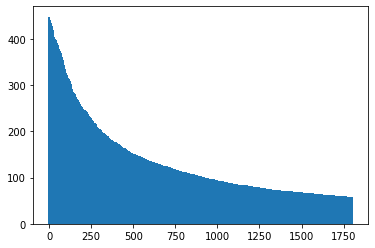

In [0]:
len(sort_nodes)

2000

In [0]:
len(sub_graph.nodes)

2400

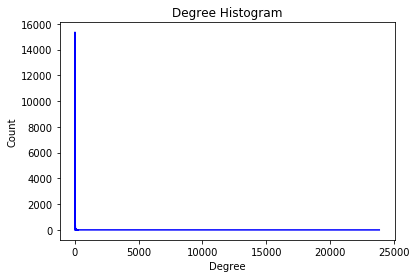

In [0]:
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_sequence = sorted([d for n, d in dG.degree()], reverse=True)  # degree sequence

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
plt.plot(deg, cnt, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")

plt.show()

In [0]:
def plot_degree_dist(G):
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees)
    plt.show()

plot_degree_dist(nx.gnp_random_graph(100, 0.5, directed=True))

In [0]:
MODELS_DIR = 'models_sna/'
!mkdir -p {MODELS_DIR}

lr = 0.05
dim = 100
ws = 5
epoch = 5
minCount = 5
neg = 5
loss = 'ns'
t = 1e-4

from gensim.models import Word2Vec, KeyedVectors
from gensim.models.word2vec import Text8Corpus

# Same values as used for fastText training above
params = {
    'alpha': lr,
    'size': dim,
    'window': ws,
    'iter': epoch,
    'min_count': minCount,
    'sample': t,
    'sg': 1,
    'hs': 0,
    'negative': neg
}

def train_models(corpus_file, output_name):
    output_file = '{:s}_ft'.format(output_name)
    if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file))):
        print('Training fasttext on {:s} corpus..'.format(corpus_file))
        %time !'fastText-0.9.1'/fasttext skipgram -input {corpus_file} -output {MODELS_DIR+output_file}  -lr {lr} -dim {dim} -ws {ws} -epoch {epoch} -minCount {minCount} -neg {neg} -loss {loss} -t {t}
    else:
        print('\nUsing existing model file {:s}.vec'.format(output_file))
        
    output_file = '{:s}_gs'.format(output_name)
    if not os.path.isfile(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file))):
        print('\nTraining word2vec on {:s} corpus..'.format(corpus_file))
        
        # Text8Corpus class for reading space-separated words file
        %time gs_model = Word2Vec(Text8Corpus(corpus_file), **params); gs_model
        # Direct local variable lookup doesn't work properly with magic statements (%time)
        locals()['gs_model'].wv.save_word2vec_format(os.path.join(MODELS_DIR, '{:s}.vec'.format(output_file)))
        print('\nSaved gensim model as {:s}.vec'.format(output_file))
    else:
        print('\nUsing existing model file {:s}.vec'.format(output_file))
    

evaluation_data = {}

Train on Wiki

In [0]:
train_models(corpus_file='text8', output_name='text8')


Using existing model file text8_ft.vec

Using existing model file text8_gs.vec


Train on Wiki without words with highest degree

In [0]:
train_models(corpus_file='text8_cl', output_name='text8_cl')

Training fasttext on text8_cl corpus..
Read 7M words
Number of words:  88764
Number of labels: 0
Progress: 100.0% words/sec/thread:    4858 lr:  0.000000 loss:  1.800021 ETA:   0h 0m


2019-12-24 16:10:00,971 : INFO : collecting all words and their counts
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-24 16:10:00,988 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


CPU times: user 7.09 s, sys: 1.41 s, total: 8.5 s
Wall time: 10min 56s

Training word2vec on text8_cl corpus..


2019-12-24 16:10:06,789 : INFO : collected 2246853 word types from a corpus of 7412797 raw words and 742 sentences
2019-12-24 16:10:06,790 : INFO : Loading a fresh vocabulary
2019-12-24 16:10:07,796 : INFO : effective_min_count=5 retains 88764 unique words (3% of original 2246853, drops 2158089)
2019-12-24 16:10:07,797 : INFO : effective_min_count=5 leaves 4938322 word corpus (66% of original 7412797, drops 2474475)
2019-12-24 16:10:08,115 : INFO : deleting the raw counts dictionary of 2246853 items
2019-12-24 16:10:08,202 : INFO : sample=0.0001 downsamples 501 most-common words
2019-12-24 16:10:08,205 : INFO : downsampling leaves estimated 4056572 word corpus (82.1% of prior 4938322)
2019-12-24 16:10:08,620 : INFO : estimated required memory for 88764 words and 100 dimensions: 115393200 bytes
2019-12-24 16:10:08,622 : INFO : resetting layer weights
2019-12-24 16:10:26,780 : INFO : training model with 3 workers on 88764 vocabulary and 100 features, using sg=1 hs=0 sample=0.0001 negativ

CPU times: user 6min 9s, sys: 1.6 s, total: 6min 10s
Wall time: 3min 22s

Saved gensim model as text8_cl_gs.vec


In [0]:
train_models('brown_corp.txt', 'brown')


Using existing model file brown_ft.vec

Using existing model file brown_gs.vec


In [0]:
!rm models_sna/brown_corp_cl_gs.vec

In [0]:
train_models(corpus_file='brown_corp_cl.txt', output_name='brown_corp_cl')

Training fasttext on brown_corp_cl.txt corpus..
Read 0M words
Number of words:  11389
Number of labels: 0
Progress: 100.0% words/sec/thread:    8324 lr:  0.000000 loss:  2.409277 ETA:   0h 0m
CPU times: user 441 ms, sys: 112 ms, total: 553 ms
Wall time: 42.5 s

Training word2vec on brown_corp_cl.txt corpus..


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


CPU times: user 19.8 s, sys: 120 ms, total: 20 s
Wall time: 11.6 s

Saved gensim model as brown_corp_cl_gs.vec


# Comparisons

In [0]:
# download the file questions-words.txt to be used for comparing word embeddings
!wget https://raw.githubusercontent.com/tmikolov/word2vec/master/questions-words.txt

--2019-12-24 15:58:36--  https://raw.githubusercontent.com/tmikolov/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt.1’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.06s   

2019-12-24 15:58:38 (8.89 MB/s) - ‘questions-words.txt.1’ saved [603955/603955]



In [0]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

# Training times in seconds
evaluation_data['brown'] = [(18.4, 56.2)]
evaluation_data['text8'] = [(8, 14)]
evaluation_data['brown_cl'] = [(11.6, 42.5)]
evaluation_data['text8_cl'] = [(3.22, 10.56)]

def print_accuracy(model, questions_file):
    print('Evaluating...\n')
    acc = model.accuracy(questions_file)

    sem_correct = sum((len(acc[i]['correct']) for i in range(5)))
    sem_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5))
    sem_acc = 100*float(sem_correct)/sem_total
    print('\nSemantic: {:d}/{:d}, Accuracy: {:.2f}%'.format(sem_correct, sem_total, sem_acc))
    
    syn_correct = sum((len(acc[i]['correct']) for i in range(5, len(acc)-1)))
    syn_total = sum((len(acc[i]['correct']) + len(acc[i]['incorrect'])) for i in range(5,len(acc)-1))
    syn_acc = 100*float(syn_correct)/syn_total
    print('Syntactic: {:d}/{:d}, Accuracy: {:.2f}%\n'.format(syn_correct, syn_total, syn_acc))
    return (sem_acc, syn_acc)

word_analogies_file = 'questions-words.txt'
accuracies = []

In [0]:
print('\nLoading Gensim embeddings')
brown_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'text8_gs.vec')
print('Accuracy for Word2Vec:')
accuracies.append(print_accuracy(brown_gs, word_analogies_file))

print('\nLoading FastText embeddings')
brown_ft = KeyedVectors.load_word2vec_format(MODELS_DIR + 'text8_ft.vec')
print('Accuracy for FastText (with n-grams):')
accuracies.append(print_accuracy(brown_ft, word_analogies_file))

evaluation_data['text8'] += [[acc[0] for acc in accuracies], [acc[1] for acc in accuracies]]

2019-12-24 16:27:47,888 : INFO : loading projection weights from models_sna/text8_gs.vec



Loading Gensim embeddings


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-24 16:27:55,483 : INFO : loaded (71290, 100) matrix from models_sna/text8_gs.vec
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if sys.path[0] == '':


Accuracy for Word2Vec:
Evaluating...



2019-12-24 16:27:56,858 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2019-12-24 16:27:59,494 : INFO : capital-common-countries: 69.8% (353/506)
2019-12-24 16:28:06,891 : INFO : capital-world: 44.8% (650/1452)
2019-12-24 16:28:08,271 : INFO : currency: 19.8% (53/268)
2019-12-24 16:28:16,308 : INFO : city-in-state: 26.0% (409/1571)
2019-12-24 16:28:18,099 : INFO : family: 63.4% (194/306)
2019-12-24 16:28:22,041 : INFO : gram1-adjective-to-adverb: 14.0% (106/756)
2019-12-24 16:28:23,596 : INFO : gram2-opposite: 10.1% (31/306)
2019-12-24 16:28:30,022 : INFO : gram3-comparative: 50.6% (637/1260)
2019-12-24 16:28:32,619 : INFO : gram4-superlative: 32.6% (165/506)
2019-12-24 16:28:37,656 : INFO : gram5-presen


Semantic: 1659/4103, Accuracy: 40.43%
Syntactic: 3324/8165, Accuracy: 40.71%


Loading FastText embeddings


2019-12-24 16:29:07,446 : INFO : loaded (71290, 100) matrix from models_sna/text8_ft.vec
2019-12-24 16:29:07,486 : INFO : precomputing L2-norms of word weight vectors


Accuracy for FastText (with n-grams):
Evaluating...



2019-12-24 16:29:10,153 : INFO : capital-common-countries: 67.2% (340/506)
2019-12-24 16:29:17,669 : INFO : capital-world: 42.8% (622/1452)
2019-12-24 16:29:19,060 : INFO : currency: 12.3% (33/268)
2019-12-24 16:29:26,798 : INFO : city-in-state: 19.3% (292/1511)
2019-12-24 16:29:28,351 : INFO : family: 52.9% (162/306)
2019-12-24 16:29:32,101 : INFO : gram1-adjective-to-adverb: 75.1% (568/756)
2019-12-24 16:29:33,628 : INFO : gram2-opposite: 56.9% (174/306)
2019-12-24 16:29:39,879 : INFO : gram3-comparative: 70.6% (889/1260)
2019-12-24 16:29:42,421 : INFO : gram4-superlative: 59.3% (300/506)
2019-12-24 16:29:47,405 : INFO : gram5-present-participle: 55.3% (549/992)
2019-12-24 16:29:54,270 : INFO : gram6-nationality-adjective: 93.4% (1280/1371)
2019-12-24 16:30:01,006 : INFO : gram7-past-tense: 34.2% (456/1332)
2019-12-24 16:30:06,104 : INFO : gram8-plural: 88.2% (875/992)
2019-12-24 16:30:09,415 : INFO : gram9-plural-verbs: 58.0% (377/650)
2019-12-24 16:30:09,417 : INFO : total: 56.7% (


Semantic: 1449/4043, Accuracy: 35.84%
Syntactic: 5468/8165, Accuracy: 66.97%



In [0]:
print('\nLoading Gensim embeddings')
brown_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'text8_cl_gs.vec')
print('Accuracy for Word2Vec:')
accuracies.append(print_accuracy(brown_gs, word_analogies_file))

print('\nLoading FastText embeddings')
brown_ft = KeyedVectors.load_word2vec_format(MODELS_DIR + 'text8_cl_ft.vec')
print('Accuracy for FastText (with n-grams):')
accuracies.append(print_accuracy(brown_ft, word_analogies_file))

evaluation_data['text8_cl'] += [[acc[0] for acc in accuracies], [acc[1] for acc in accuracies]]

2019-12-24 16:30:09,452 : INFO : loading projection weights from models_sna/text8_cl_gs.vec
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Loading Gensim embeddings


2019-12-24 16:30:19,802 : INFO : loaded (88764, 100) matrix from models_sna/text8_cl_gs.vec
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if sys.path[0] == '':
2019-12-24 16:30:19,851 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Accuracy for Word2Vec:
Evaluating...



2019-12-24 16:30:21,638 : INFO : capital-common-countries: 29.2% (100/342)
2019-12-24 16:30:25,222 : INFO : capital-world: 14.0% (98/699)
2019-12-24 16:30:26,426 : INFO : currency: 13.6% (32/236)
2019-12-24 16:30:32,302 : INFO : city-in-state: 6.7% (77/1152)
2019-12-24 16:30:33,238 : INFO : family: 11.0% (20/182)
2019-12-24 16:30:36,593 : INFO : gram1-adjective-to-adverb: 2.8% (18/650)
2019-12-24 16:30:37,281 : INFO : gram2-opposite: 3.8% (5/132)
2019-12-24 16:30:43,039 : INFO : gram3-comparative: 12.9% (145/1122)
2019-12-24 16:30:44,786 : INFO : gram4-superlative: 7.3% (25/342)
2019-12-24 16:30:48,100 : INFO : gram5-present-participle: 1.7% (11/650)
2019-12-24 16:30:55,033 : INFO : gram6-nationality-adjective: 56.5% (775/1371)
2019-12-24 16:31:00,041 : INFO : gram7-past-tense: 5.1% (51/992)
2019-12-24 16:31:05,101 : INFO : gram8-plural: 23.8% (236/992)
2019-12-24 16:31:07,469 : INFO : gram9-plural-verbs: 3.7% (17/462)
2019-12-24 16:31:07,475 : INFO : total: 17.3% (1610/9324)
2019-12-2


Semantic: 327/2611, Accuracy: 12.52%
Syntactic: 1283/6713, Accuracy: 19.11%


Loading FastText embeddings


2019-12-24 16:31:16,801 : INFO : loaded (88764, 100) matrix from models_sna/text8_cl_ft.vec
2019-12-24 16:31:16,856 : INFO : precomputing L2-norms of word weight vectors


Accuracy for FastText (with n-grams):
Evaluating...



2019-12-24 16:31:18,628 : INFO : capital-common-countries: 32.2% (110/342)
2019-12-24 16:31:22,185 : INFO : capital-world: 19.2% (134/699)
2019-12-24 16:31:23,381 : INFO : currency: 7.2% (17/236)
2019-12-24 16:31:29,434 : INFO : city-in-state: 9.2% (111/1203)
2019-12-24 16:31:30,358 : INFO : family: 20.9% (38/182)
2019-12-24 16:31:33,611 : INFO : gram1-adjective-to-adverb: 69.1% (449/650)
2019-12-24 16:31:34,284 : INFO : gram2-opposite: 68.2% (90/132)
2019-12-24 16:31:40,000 : INFO : gram3-comparative: 54.5% (611/1122)
2019-12-24 16:31:41,808 : INFO : gram4-superlative: 41.2% (141/342)
2019-12-24 16:31:45,072 : INFO : gram5-present-participle: 32.3% (210/650)
2019-12-24 16:31:51,899 : INFO : gram6-nationality-adjective: 82.5% (1131/1371)
2019-12-24 16:31:56,856 : INFO : gram7-past-tense: 13.2% (131/992)
2019-12-24 16:32:01,782 : INFO : gram8-plural: 79.3% (787/992)
2019-12-24 16:32:04,140 : INFO : gram9-plural-verbs: 59.5% (275/462)
2019-12-24 16:32:04,146 : INFO : total: 45.2% (4235/9


Semantic: 410/2662, Accuracy: 15.40%
Syntactic: 3825/6713, Accuracy: 56.98%



In [0]:
print('\nLoading Gensim embeddings')
brown_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'brown_gs.vec')
print('Accuracy for Word2Vec:')
accuracies.append(print_accuracy(brown_gs, word_analogies_file))

print('\nLoading FastText embeddings')
brown_ft = KeyedVectors.load_word2vec_format(MODELS_DIR + 'brown_ft.vec')
print('Accuracy for FastText (with n-grams):')
accuracies.append(print_accuracy(brown_ft, word_analogies_file))

evaluation_data['brown'] += [[acc[0] for acc in accuracies], [acc[1] for acc in accuracies]]

2019-12-24 16:32:05,037 : INFO : loading projection weights from models_sna/brown_gs.vec



Loading Gensim embeddings


/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL
2019-12-24 16:32:06,630 : INFO : loaded (15173, 100) matrix from models_sna/brown_gs.vec
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if sys.path[0] == '':
2019-12-24 16:32:06,669 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(v

Accuracy for Word2Vec:
Evaluating...



2019-12-24 16:32:06,905 : INFO : capital-common-countries: 5.6% (5/90)
2019-12-24 16:32:07,053 : INFO : capital-world: 2.3% (1/44)
2019-12-24 16:32:07,095 : INFO : currency: 0.0% (0/12)
2019-12-24 16:32:08,222 : INFO : city-in-state: 0.4% (2/457)
2019-12-24 16:32:08,745 : INFO : family: 12.9% (27/210)
2019-12-24 16:32:10,562 : INFO : gram1-adjective-to-adverb: 0.4% (3/756)
2019-12-24 16:32:10,883 : INFO : gram2-opposite: 2.3% (3/132)
2019-12-24 16:32:13,398 : INFO : gram3-comparative: 3.4% (36/1056)
2019-12-24 16:32:13,902 : INFO : gram4-superlative: 0.0% (0/210)
2019-12-24 16:32:15,435 : INFO : gram5-present-participle: 1.5% (10/650)
2019-12-24 16:32:16,144 : INFO : gram6-nationality-adjective: 2.0% (6/297)
2019-12-24 16:32:19,090 : INFO : gram7-past-tense: 0.6% (8/1260)
2019-12-24 16:32:20,404 : INFO : gram8-plural: 8.7% (48/552)
2019-12-24 16:32:21,227 : INFO : gram9-plural-verbs: 0.3% (1/342)
2019-12-24 16:32:21,229 : INFO : total: 2.5% (150/6068)
2019-12-24 16:32:21,235 : INFO : l


Semantic: 35/813, Accuracy: 4.31%
Syntactic: 115/5255, Accuracy: 2.19%


Loading FastText embeddings


2019-12-24 16:32:22,862 : INFO : loaded (15173, 100) matrix from models_sna/brown_ft.vec
2019-12-24 16:32:22,900 : INFO : precomputing L2-norms of word weight vectors


Accuracy for FastText (with n-grams):
Evaluating...



2019-12-24 16:32:23,127 : INFO : capital-common-countries: 0.0% (0/90)
2019-12-24 16:32:23,263 : INFO : capital-world: 0.0% (0/44)
2019-12-24 16:32:23,303 : INFO : currency: 0.0% (0/12)
2019-12-24 16:32:24,399 : INFO : city-in-state: 2.8% (13/457)
2019-12-24 16:32:24,898 : INFO : family: 18.6% (39/210)
2019-12-24 16:32:26,681 : INFO : gram1-adjective-to-adverb: 68.5% (518/756)
2019-12-24 16:32:27,023 : INFO : gram2-opposite: 78.0% (103/132)
2019-12-24 16:32:29,521 : INFO : gram3-comparative: 60.0% (634/1056)
2019-12-24 16:32:30,033 : INFO : gram4-superlative: 76.7% (161/210)
2019-12-24 16:32:31,574 : INFO : gram5-present-participle: 65.7% (427/650)
2019-12-24 16:32:32,301 : INFO : gram6-nationality-adjective: 34.7% (103/297)
2019-12-24 16:32:35,273 : INFO : gram7-past-tense: 11.3% (142/1260)
2019-12-24 16:32:36,580 : INFO : gram8-plural: 52.4% (289/552)
2019-12-24 16:32:37,395 : INFO : gram9-plural-verbs: 76.0% (260/342)
2019-12-24 16:32:37,396 : INFO : total: 44.3% (2689/6068)



Semantic: 52/813, Accuracy: 6.40%
Syntactic: 2637/5255, Accuracy: 50.18%



In [0]:
print('\nLoading Gensim embeddings')
brown_gs = KeyedVectors.load_word2vec_format(MODELS_DIR + 'brown_corp_cl_gs.vec')
print('Accuracy for Word2Vec:')
accuracies.append(print_accuracy(brown_gs, word_analogies_file))

print('\nLoading FastText embeddings')
brown_ft = KeyedVectors.load_word2vec_format(MODELS_DIR + 'brown_corp_cl_ft.vec')
print('Accuracy for FastText (with n-grams):')
accuracies.append(print_accuracy(brown_ft, word_analogies_file))

evaluation_data['brown_cl'] += [[acc[0] for acc in accuracies], [acc[1] for acc in accuracies]]

2019-12-24 16:32:37,428 : INFO : loading projection weights from models_sna/brown_corp_cl_gs.vec
/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:402: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL



Loading Gensim embeddings


2019-12-24 16:32:38,677 : INFO : loaded (11389, 100) matrix from models_sna/brown_corp_cl_gs.vec
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `accuracy` (Method will be removed in 4.0.0, use self.evaluate_word_analogies() instead).
  if sys.path[0] == '':


Accuracy for Word2Vec:
Evaluating...



2019-12-24 16:32:39,653 : INFO : precomputing L2-norms of word weight vectors
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):
2019-12-24 16:32:39,716 : INFO : capital-common-countries: 0.0% (0/30)
2019-12-24 16:32:39,771 : INFO : capital-world: 0.0% (0/14)
2019-12-24 16:32:39,784 : INFO : currency: 0.0% (0/2)
2019-12-24 16:32:40,064 : INFO : city-in-state: 0.0% (0/142)
2019-12-24 16:32:40,271 : INFO : family: 0.0% (0/110)
2019-12-24 16:32:41,317 : INFO : gram1-adjective-to-adverb: 0.3% (2/600)
2019-12-24 16:32:41,426 : INFO : gram2-opposite: 0.0% (0/56)
2019-12-24 16:32:42,551 : INFO : gram3-comparative: 0.2% (1/650)
2019-12-24 16:32:42,755 : INFO : gram4-superlative: 0.0% (0/110)
2019-12-24 16:32:43,424 : INFO : gram5-present-participle: 0.3% (1/380)
2019-1


Semantic: 0/298, Accuracy: 0.00%
Syntactic: 19/3283, Accuracy: 0.58%


Loading FastText embeddings


2019-12-24 16:32:47,293 : INFO : loaded (11389, 100) matrix from models_sna/brown_corp_cl_ft.vec
2019-12-24 16:32:47,321 : INFO : precomputing L2-norms of word weight vectors
2019-12-24 16:32:47,391 : INFO : capital-common-countries: 0.0% (0/30)
2019-12-24 16:32:47,448 : INFO : capital-world: 0.0% (0/14)
2019-12-24 16:32:47,461 : INFO : currency: 0.0% (0/2)


Accuracy for FastText (with n-grams):
Evaluating...



2019-12-24 16:32:47,737 : INFO : city-in-state: 0.7% (1/142)
2019-12-24 16:32:47,938 : INFO : family: 8.2% (9/110)
2019-12-24 16:32:49,012 : INFO : gram1-adjective-to-adverb: 67.5% (405/600)
2019-12-24 16:32:49,125 : INFO : gram2-opposite: 80.4% (45/56)
2019-12-24 16:32:50,288 : INFO : gram3-comparative: 38.6% (251/650)
2019-12-24 16:32:50,498 : INFO : gram4-superlative: 68.2% (75/110)
2019-12-24 16:32:51,179 : INFO : gram5-present-participle: 57.4% (218/380)
2019-12-24 16:32:51,342 : INFO : gram6-nationality-adjective: 23.0% (20/87)
2019-12-24 16:32:52,672 : INFO : gram7-past-tense: 4.4% (33/756)
2019-12-24 16:32:53,502 : INFO : gram8-plural: 50.0% (231/462)
2019-12-24 16:32:53,833 : INFO : gram9-plural-verbs: 64.3% (117/182)
2019-12-24 16:32:53,839 : INFO : total: 39.2% (1405/3581)



Semantic: 10/298, Accuracy: 3.36%
Syntactic: 1395/3283, Accuracy: 42.49%

